# Blockbusters Analysis

A dataset was found on Kaggle which outlines information on the top 10 highest grossing movies between the years 1975 and 2018. The dataset can be found here: https://www.kaggle.com/bidyutchanda/top-10-highest-grossing-films-19752018

Using the information in the dataset, the intention is to do some initial data analysis to answer two simpler questions and then to fit a model to the data to determine whether the success of a movie can be predicted from the collected information.

## Questions to answer

1. Do higher rated movies gross more highly?

2. Are higher grossing movies due to the fact they are open to a wider audience?

3. Can the movie gross be predicted before release based on parameters in the dataset?

In [132]:
# import commonly libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [133]:
# read the csv data into a pandas dataframe and view a sample of the dataframe to check it has imported as expected
movie_data = pd.read_csv("blockbusters.csv")
movie_data.sample(10)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
74,Thriller,Adventure,Action,7.4,133,5,PG-13,Paramount Pictures,Mission: Impossible - Ghost Protocol,"$694,713,380.00",2011
372,Sci-Fi,Romance,Action,6.8,127,3,PG,Warner Bros,Superman II,"$108,185,706.00",1981
429,History,Drama,Action,6.7,132,10,PG,Universal Pictures,Midway,"$43,220,000.00",1976
137,Comedy,Adventure,Family,6.7,115,8,PG,Warner Bros,Charlie and the Chocolate Factory,"$474,968,763.00",2005
99,Comedy,NaN,NaN,7.8,100,10,R,Warner Bros,The Hangover,"$467,483,912.00",2009
247,Romance,Drama,Comedy,7.1,117,8,R,Universal Pictures,Four Weddings and a Funeral,"$245,700,832.00",1994
145,Sci-Fi,Adventure,Action,6.4,124,6,PG-13,20th Century Fox,The Day After Tomorrow,"$544,272,402.00",2004
88,Animation,Comedy,Animation,7.7,95,9,PG,Universal Pictures,Despicable Me,"$543,113,985.00",2010
249,Drama,Crime,Action,6.9,141,10,PG-13,Paramount Pictures,Clear and Present Danger,"$215,887,717.00",1994
394,Sci-Fi,Mystery,Adventure,6.4,132,5,PG,Paramount Pictures,Star Trek: The Motion Picture,"$82,258,456.00",1979


The columns imported are as expected based on the information provided on Kaggle. The column names are simple and easy to use so don't need to be changed. Nothing seems to be a problem, but it will be important to check the data types, if there are any unexpected null values and explore further before analysis.

In [50]:
# check the size of the dataframe, as the data is for the top 10 movies across 44 years I am expected 440 rows of data
movie_data.shape

(437, 11)

For some reason, it seems that there are 3 rows of data that are missing. Let's find out what's going on there...

In [51]:
# for which year(s) is there data missing?
movie_data.year.value_counts()

2018    10
2017    10
1994    10
1993    10
1992    10
1991    10
1990    10
1989    10
1988    10
1987    10
1986    10
1985    10
1984    10
1983    10
1982    10
1981    10
1980    10
1979    10
1978    10
1977    10
1976    10
1995    10
1996    10
1997    10
2008    10
2016    10
2015    10
2014    10
2013    10
2012    10
2011    10
2010    10
2009    10
2007    10
1998    10
2006    10
2005    10
2004    10
2003    10
2002    10
2001    10
2000    10
1999    10
1975     7
Name: year, dtype: int64

Looking at the number of unique values in the year column of the data set, it seems that the 3 missing rows of data are all in the year 1975. We can look into this in more detail.

In [52]:
# looking at the 1975 data specifically, what can we tell about the missing rows?
movie_data.loc[movie_data['year'] == 1975]

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
430,Drama,Crime,NaN,8.1,125,4,R,Warner Bros,Dog Day Afternoon,"$50,000,000.00",1975
431,Romance,Drama,NaN,6.3,109,5,R,Columbia Pictures,Shampoo,"$49,407,734.00",1975
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975
436,Drama,Western,War,6.4,103,10,PG,Universal Pictures,The Other Side of the Mountain,"$34,673,100.00",1975


It seems that the dataset is missing the top 3 grossing movies from 1975. The question now, is what can we do about that? Without any information on these movies it is unlikely to be representative to make up data for these rows. Given there are still 337 rows of data it is unlikely that these 3 expected rows will have a significant impact on the answers to the questions. In this case, the use of the dataset can be used without any major concerns.

In [53]:
# to ensure that the data can be used as intended, it is worth checking they are in the expected format
movie_data.dtypes

Main_Genre          object
Genre_2             object
Genre_3             object
imdb_rating        float64
length               int64
rank_in_year         int64
rating              object
studio              object
title               object
worldwide_gross     object
year                 int64
dtype: object

All the columns of data are as expected and in a form that can be manipulated or used to answer the questions posed, except worldwide_gross. This ideally will be a number, but is not due to the dollar sign in each cell. This should be cleaned up.

In [54]:
# Remove the dollar sign from the worldwide_gross column and check this has worked
movie_data.worldwide_gross = [x.strip('$') for x in movie_data.worldwide_gross]
movie_data.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"318,491,426",2018


Excellent - this seems to have worked as expected but it's worth checking the type before we start using it.

In [55]:
# check data types of columns once more
movie_data.dtypes

Main_Genre          object
Genre_2             object
Genre_3             object
imdb_rating        float64
length               int64
rank_in_year         int64
rating              object
studio              object
title               object
worldwide_gross     object
year                 int64
dtype: object

The worldwide_gross column is still showing as an object type rather than a float which is what we need. It's likely this is due to the commas in the data. So let's convert that now.

In [56]:
# remove commas from worldwide_gross and convert to integer type.
movie_data.worldwide_gross = movie_data.worldwide_gross.str.replace(',', '').astype(float)
movie_data.sample(10)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
415,Fantasy,Comedy,NaN,6.5,98,6,PG,Warner Bros,"Oh, God!",51061196.0,1977
169,Sci-Fi,Mystery,Action,7.7,145,10,PG-13,DreamWorks,Minority Report,358372926.0,2002
208,Romance,Drama,Comedy,7.2,123,9,R,Universal Pictures,Shakespeare in Love,289317794.0,1998
92,Animation,Adventure,Action,7.0,94,3,PG,20th Century Fox,Ice Age: Dawn of the Dinosaurs,886686817.0,2009
349,Sci-Fi,Adventure,Action,6.6,105,10,PG,Paramount Pictures,Star Trek III: The Search for Spock,76572238.0,1984
313,War,Drama,Comedy,7.3,121,4,R,Walt Disney Pictures,"Good Morning, Vietnam",123922370.0,1987
64,Comedy,Animation,Adventure,6.7,88,5,PG,20th Century Fox,Ice Age: Continental Drift,877244782.0,2012
311,Thriller,Drama,NaN,6.9,119,2,R,Paramount Pictures,Fatal Attraction,156645693.0,1987
256,Thriller,Adventure,Action,6.3,112,7,R,Sony Pictures,Cliffhanger,255000211.0,1993
416,War,History,Drama,7.4,175,7,PG,Metro-Goldwyn-Mayer,A Bridge Too Far,50750000.0,1977


In [57]:
# check the types of the columns
movie_data.dtypes

Main_Genre          object
Genre_2             object
Genre_3             object
imdb_rating        float64
length               int64
rank_in_year         int64
rating              object
studio              object
title               object
worldwide_gross    float64
year                 int64
dtype: object

It would now be worth checking if there are any unexpected null values in the data. We can expect null values in the Genre_2 and Genre_3 columns as movies may only fit into one genre. However, there should be no other null values.

In [58]:
# count null values in each column
movie_data.isnull().sum()

Main_Genre           0
Genre_2             29
Genre_3            141
imdb_rating          0
length               0
rank_in_year         0
rating               0
studio               0
title                0
worldwide_gross      0
year                 0
dtype: int64

Great - as thre are only null values in the expected columns we can move towards using the data to answer the questions posed at the beginning.

# Question 1: Are higher grossing movies due to the fact they are open to a wider audience?

Here we can use only the imdb_rating and the worldwide_gross to find out the answer to this question. First let's select the data into a new dataframe and create a simple plot to see if there is an obvious answer.

In [75]:
# select data relevant for question 1 and check it's as expected
q1_data = movie_data[['imdb_rating', 'worldwide_gross']]
q1_data.sample(5)

,imdb_rating,worldwide_gross
340,7.8,2.386321e+08
245,4.8,3.416312e+08
243,6.8,3.515834e+08
80,8.4,1.063172e+09
246,7.3,2.472754e+08


Now we've got the data in a simplified form for use, it can be plotted to see if there are any observable trends.

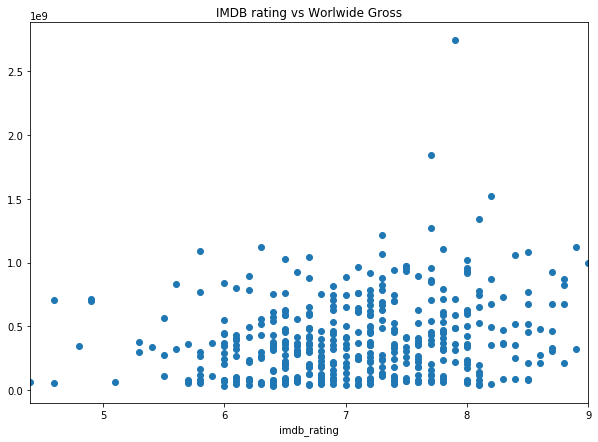

In [76]:
# plot data for question 1
q1_data.plot(x='imdb_rating', y='worldwide_gross', style='o', figsize=(10,7), title = "IMDB rating vs Worldwide Gross",
            legend = False, );

From the inital graph, it's difficult to see a definitive trend in the data. This is likely to be due to the one anomalous point at about 7.8 on the rating, with a very high gross. Perhaps with the removal of this point, and replotting the value, a trend may be seen visually.

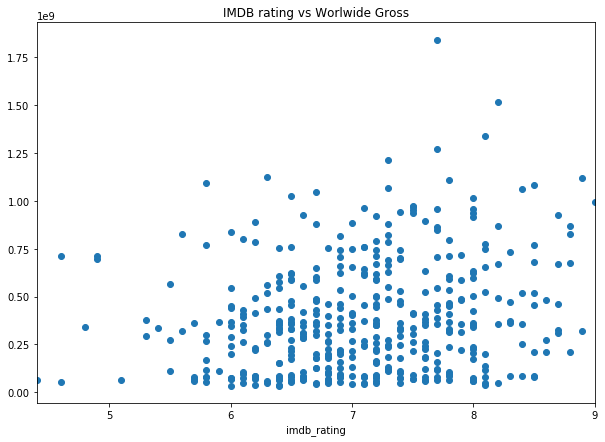

In [77]:
# remove the anomalous point on the graph and replot
max_gross = q1_data.worldwide_gross.max()
q1_data2 = q1_data[q1_data.worldwide_gross != max_gross]
q1_data2.plot(x='imdb_rating', y='worldwide_gross', style='o', figsize=(10,7), title = "IMDB rating vs Worlwide Gross",
            legend = False, );

Even with the removal of the anomalous point, it doesn't sem like there is an obvious trend in the data. 


__To answer question 1:__
__It could not be said that more highly rate films are higher grossing.__

## Question 2: Are higher grossing movies due to the fact they are open to a wider audience?

To do this we will be focusing on the rating column to determine the appropriate age category of films and the worldwide gross.
It could be thought that if a movie has a larger target audience (i.e. an age appropriate rating including more of the population) it may have a higher worldwide gross. Hopefully, some simple exploration will be able to answer this question.

In [94]:
# select the appropriate columns and create a simplified dataframe to work with
q2_data = movie_data[['rating', 'worldwide_gross']]
q2_data.sample(5)

,rating,worldwide_gross
66,PG-13,757930663.0
102,PG,631744560.0
38,PG,201151353.0
59,PG-13,644783140.0
168,PG,368744044.0


The simple dataframe containing only the data required for the question has been created successfully. To work out the answer to the question, a visualisation is likely to be helpful.

In [ ]:
# plot the mean worldwide_gross for each of the film ratings
q2_data.groupby('rating').mean().plot.bar(title = "Mean worldwide gross for movie rating", figsize = (10,7));

From the barchart it can be seen that the mean average gross for each of the rating categories shows that the highest grossing movies are usual rated PG-13. The movies rated for younger audiences are less successful, though those for adult audiences (R) are the least highly grossing. To confirm the trend across the categories and not just the mean, a boxplot can be create to monitor the spread of the data.

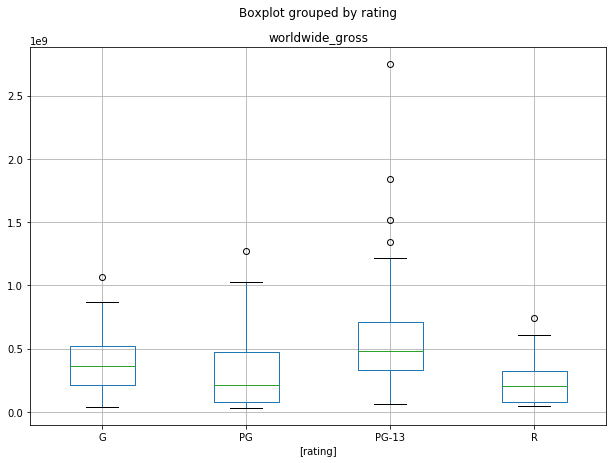

In [102]:
q2_data.boxplot(by='rating', figsize = (10,7));

The boxplots tell a similar story to the bar chart. It may have been that a couple of very high or low grossing movies in particular categories were skewing the mean. However, that does not seem to be the case. The upper limit of the ranges (excluding anomalies) follow the trend of the means.

A possible explanation for the trend is that the movies rated G and PG, though they can be viewed by all audiences, are likely to be particularly targeted at children. Therefore, they are not of interest to most adult audiences. R movies naturally exclude the younger population and often are rated as such due to the high violence, swearing or sec scenes which can be a turn off for viewers.

PG-13 movies may have the suitable middle ground for a lot of younger viewers (indeed aged 13 upwards) without being too distasteful for a more conservative adult audience. PG-13 movies have the widest realistic audience, rather than just on paper for the ages that can watch them.

__To answer question 2:
Yes (sort of), the movies that appeal to the largest audience i.e. PG-13, rather than the theoretical largest audience are the highest grossing movies.__

## Question 3: Can the movie gross be predicted before release based on parameters in the dataset?

This question is going to take some more thinking about. Firstly, we need to take the original dataset and work out which parameters are going to be useful to use for the model. Secondly, we will need to make sure the data is cleaned up and in the format required for a model i.e. numerical with no null values.

In [113]:
# lets have another look at the data that we have got
movie_data.sample(5)

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
229,Thriller,Drama,Action,6.0,115,10,R,Warner Bros,Eraser,242295562.0,1996
436,Drama,Western,War,6.4,103,10,PG,Universal Pictures,The Other Side of the Mountain,34673100.0,1975
238,Sci-Fi,Adventure,Action,6.1,135,9,PG-13,Universal Pictures,Waterworld,264218220.0,1995
427,Crime,Comedy,Action,6.9,114,8,PG,20th Century Fox,Silver Streak,51079064.0,1976
36,Action,Adventure,Fantasy,6.6,137,7,PG-13,Lionsgate Films,The Hunger Games: Mockingjay - Part 2,281723902.0,2015


Looking at the data, there are several columns that should be dropped before applying the model:
- imdb_rating: this wouldn't be known before the film release
- rank_in_year: this wouldn't be known before the film release
- title: generally film titles are unique and therefore would not be an accurate predictor of worldwide gross
- year: the previous years won't be repeated so including them in the model will likely create a more inaccurate model when used on new data

In [114]:
# drop the columns that are not required
q3_data = movie_data.drop(['imdb_rating', 'rank_in_year', 'title', 'year'], axis = 1)
q3_data.sample(5)

,Main_Genre,Genre_2,Genre_3,length,rating,studio,worldwide_gross
310,Family,Drama,Comedy,102,PG,Walt Disney Pictures,167780960.0
169,Sci-Fi,Mystery,Action,145,PG-13,DreamWorks,358372926.0
373,Romance,Comedy,NaN,97,PG,Warner Bros,95461682.0
181,Drama,Action,NaN,155,R,DreamWorks,457640427.0
236,Thriller,Drama,Thriller,127,R,Warner Bros,327311859.0


That has now left us with the data that we're going to want to use for the analysis. The predictor variables, or X variables, will be the three genre columns, length, rating and studio. The worldwide_gross is the dependent, or y, variable i.e. the one we want to predict.

To do this, I am going to use a linear regression model and for that I'm going to need to import some of the tools required to create and test my model. Usually, imports would be done ast the beginning of the script, but as I want to keep the necessary information together for clarity I will import them now.

In [115]:
# import tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Before the model can be applied, the columns need cleaning up to prevent errors. All the predictor columns, except length, are going to need encoding as they are object types. There are 2 types of encoding method here that could be used: either encode the values in the column or create new columns for each object to be encoded. The issue with the former is that the computer assigns a hierachy to the valyes though there isn't necessarily one. The issue with the latter is that we will end up with a very large dataframe which is going to be very inefficient. For the time being, the first approach will be used and the encoding method "Label Encoder" will be used.

We should remember that there were some null values in two of the genre columns - this is actually useful information so it would be unwise to drop these values. It would be useufl to include these in the model as they could be informative for the predictions. So they can be used, they should be covnerted to strings.

In [116]:
# import relevant function
from sklearn.preprocessing import LabelEncoder

# instantiate label encoder
label_encoder= LabelEncoder()

# replace null values with a string so they can be encoded
q3_data = q3_data.fillna('NaN')

# create encoder values for the dataframe, a value for each unique string in the columns stated
label_encoder.fit(q3_data[['Main_Genre', 'Genre_2', 'Genre_3', 'rating', 'studio']].stack().unique())

q3_data['Main_Genre'] = label_encoder.transform(q3_data['Main_Genre'])
q3_data['Genre_2'] = label_encoder.transform(q3_data['Genre_2'])
q3_data['Genre_3'] = label_encoder.transform(q3_data['Genre_3'])
q3_data['rating'] = label_encoder.transform(q3_data['rating'])
q3_data['studio'] = label_encoder.transform(q3_data['studio'])

q3_data.sample(10)

,Main_Genre,Genre_2,Genre_3,length,rating,studio,worldwide_gross
247,31,9,6,117,30,37,245700832.0
391,16,9,23,117,30,19,86432520.0
67,6,2,3,93,26,28,746921274.0
203,31,6,23,119,30,0,369884651.0
147,2,23,23,163,30,40,497409852.0
229,36,9,1,115,30,40,242295562.0
343,16,6,23,106,26,40,153083102.0
144,9,23,23,127,30,25,611899420.0
84,6,3,2,93,26,28,752600867.0
6,1,6,23,118,27,38,216648740.0


Now the data has been encoded, we can fit our Regression Model. To test how good our model is, it is important to split the data into test and train sets. That way we can train the model on some of the data and test how good it is on brand new data.

In [121]:
# assign the relevant columns of the dataframe into X and y
X = q3_data[['Main_Genre', 'Genre_2', 'Genre_3', 'length', 'rating', 'studio']]
y = q3_data[['worldwide_gross']]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

In [122]:
# instantiate the linear regression model
lm_model = LinearRegression()

# fit the linear regression model
lm_model.fit(X_train, y_train)

# predict the worldwide_gross for the test data
y_test_preds = lm_model.predict(X_test)

# evaluate how good the model is
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.15821370970915838 on 132 values.'

The calculated r-squared score is between 0 and 1: values lower than 0.12 indicate a low score, values above 0.26 are considered high scores. In this case, the model prediction is on the lower side of fair. So not really that reliable. Perhaps the model could be improved by using fewer predictor variables. This could be done for instance by removing the length of the movie as shown below...

In [123]:
# assign the relevant columns of the dataframe into X and y
X = q3_data[['Main_Genre', 'Genre_2', 'Genre_3', 'rating', 'studio']]
y = q3_data[['worldwide_gross']]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# instantiate the linear regression model
lm_model = LinearRegression()

# fit the linear regression model
lm_model.fit(X_train, y_train)

# predict the worldwide_gross for the test data
y_test_preds = lm_model.predict(X_test)

# evaluate how good the model is
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.04501228629066534 on 132 values.'

Removing the length of the movie as an indicator really deminishes the accuracy of the model - this is not something we want to remove.

Instead you could remove the additional genre categories and try again:

In [124]:
# assign the relevant columns of the dataframe into X and y
X = q3_data[['Main_Genre', 'length', 'rating', 'studio']]
y = q3_data[['worldwide_gross']]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# instantiate the linear regression model
lm_model = LinearRegression()

# fit the linear regression model
lm_model.fit(X_train, y_train)

# predict the worldwide_gross for the test data
y_test_preds = lm_model.predict(X_test)

# evaluate how good the model is
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.13343651348005015 on 132 values.'

This has diminished the accuracy a little bit but not a great deal. 

The above models have been done with a random selection of predictor variables, but to really explore further which variables are worth using in the prediction model, something like a Principle Component Analysis or a correlation algorithm could be used to determine the correlation between the variables to see which predictors are most likely to impact on the worldwide gross.

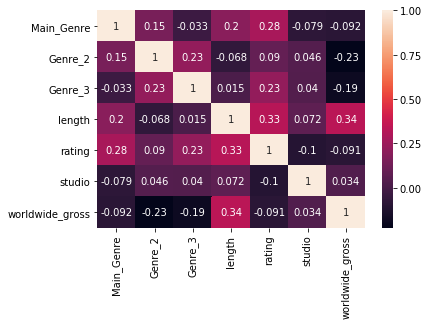

In [131]:
# use a correlation algorithm on the data
sns.heatmap(q3_data.corr(), annot = True)

Based on the above correlation matrix, it looks like the highest correlation between the worldwide_gross and it's predictors are: length, rating, genre_2 and genre_3. Perhaps it's worth looking to see if using these variables creates a more accurate predictor model.

In [137]:
# assign the relevant columns of the dataframe into X and y
X = q3_data[['Genre_2', 'Genre_3', 'length', 'rating']]
y = q3_data[['worldwide_gross']]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# instantiate the linear regression model
lm_model = LinearRegression()

# fit the linear regression model
lm_model.fit(X_train, y_train)

# predict the worldwide_gross for the test data
y_test_preds = lm_model.predict(X_test)

# evaluate how good the model is
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.15237738039868842 on 132 values.'

Using just a select few of the predictor variables based on their correlation to the outcome variable has yeilded a slightly worst predictor model than with all the values.

There could be a couple of reasons the predictor model isn't doing a great job:
1. a different model would be more appropriate to a linear regression
2. the encoding method was poor and perhaps doing a non-hierachical one would have been more appropriate
3. the data is just too varied to be able to predict how well a movie is going to do

__To answer question 3: based on this model, no we can not predict how well a movie is going to do based on the data that has been collected pre-release__